In [16]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
#1. reading the csv file:

#load the provided csv file into a pandas dataframe
file_path = '/Users/ciarafasullo/Desktop/DS2002/acc_players-2324F.csv'
df = pd.read_csv(file_path, header=1)

#display the first 5 rows of the dataframe
df.head()


,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
0,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.200,0.615,4.1,-0.1,-6.4
1,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.500,0.500,NaN,NaN,3.5,0.0,-6.7
2,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.620,9.4,0.9,-1.3
3,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0.000,1.000,NaN,1.1,0.0,-8.2
4,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18.0,2.9,7.9


In [18]:
#2. basic analysis

#calculate the total points scored by all players combined
total_points = df['PTS'].sum()
print(f"Total Points Scored by All Players Combined: {total_points}")

#find the player who has played the most minutes (MP)
most_minutes_player = df.loc[df['MP'].idxmax(), 'Player']
print(f"Player with Most Minuts Played: {most_minutes_player}")

#identify the top 5 players in terms of total rebounds (TRB)
top_5_rebounders = df[['Player', 'TRB']].sort_values(by='TRB', ascending=False).head(5)
print("Top 5 Players by Total Rebounds:")
print(top_5_rebounders)


Total Points Scored by All Players Combined: 38411
Player with Most Minuts Played: Casey Morsell
Top 5 Players by Total Rebounds:
              Player  TRB
5      Armando Bacot  380
178  Ian Schieffelin  340
90   Harrison Ingram  327
44    Mohamed Diarra  311
149    Norchad Omier  309


In [19]:
#3. player filtering

#create a new dataframe containing only players who played more than 500 minutes
df_filtered = df[df['MP'] > 500]

#from this filtered dataframe, determine the player with the highest total assists (AST)
top_assist_player = df_filtered.loc[df_filtered['AST'].idxmax(), 'Player']
print(f"Player with the Highest Total Assists (with playing time more than 500 minutes): {top_assist_player}")

#who are the top 3 assist leads in the league?
top_3_assist_leaders = df[['Player', 'AST']].sort_values(by='AST', ascending=False).head(3)
print("Top 3 Assist Leaders in the League:")
print(top_3_assist_leaders)

#who are the top 3 shot blockers?
top_3_shot_blockers = df[['Player', 'BLK']].sort_values(by='BLK', ascending=False).head(3)
print("Top 3 Shot Blockers in the League:")
print(top_3_shot_blockers)

Player with the Highest Total Assists (with playing time more than 500 minutes): Reece Beekman
Top 3 Assist Leaders in the League:
             Player  AST
7     Reece Beekman  212
215  Jaeden Zackery  152
21    Elliot Cadeau  150
Top 3 Shot Blockers in the League:
            Player  BLK
51       Ryan Dunn   77
157   Quinten Post   61
5    Armando Bacot   56


In [20]:
#4. school-based analysis

#group the players by school and calculate the total points scored by each school
school_points = df.groupby('School')['PTS'].sum().reset_index().sort_values(by='PTS', ascending=False)
print("Total Points by School:")
print(school_points)

#group the players by school and calculate the total assists (AST) for each team
school_assists = df.groupby('School')['AST'].sum().reset_index().sort_values(by='AST', ascending=False)
print("Total Assists by School:")
print(school_assists)

#sort the schools by total points scored and display the top 3 schools
top_3_schools = school_points.head(3)
print("Top 3 Schools by Total Points:")
print(top_3_schools)

Total Points by School:
            School   PTS
7         NC State  3101
8   North Carolina  3032
2             Duke  2830
1          Clemson  2785
14     Wake Forest  2733
0   Boston College  2667
13   Virginia Tech  2547
3    Florida State  2526
10      Pittsburgh  2495
11        Syracuse  2442
6       Miami (FL)  2424
5       Louisville  2304
4     Georgia Tech  2272
12        Virginia  2140
9       Notre Dame  2113
Total Assists by School:
            School  AST
2             Duke  551
7         NC State  536
8   North Carolina  536
1          Clemson  533
13   Virginia Tech  514
0   Boston College  509
12        Virginia  509
6       Miami (FL)  454
10      Pittsburgh  452
11        Syracuse  442
14     Wake Forest  429
4     Georgia Tech  425
3    Florida State  406
5       Louisville  356
9       Notre Dame  335
Top 3 Schools by Total Points:
           School   PTS
7        NC State  3101
8  North Carolina  3032
2            Duke  2830


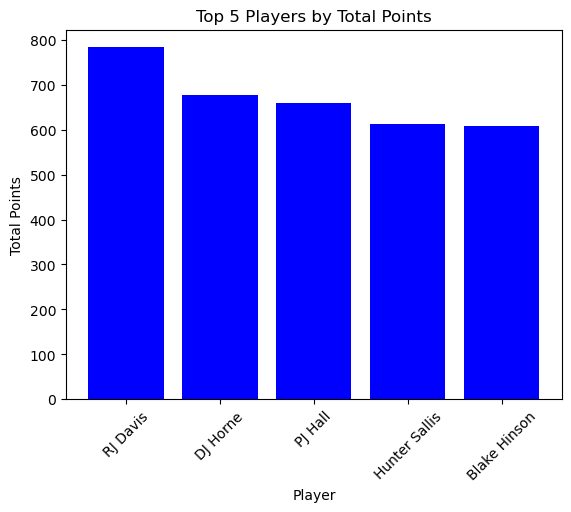

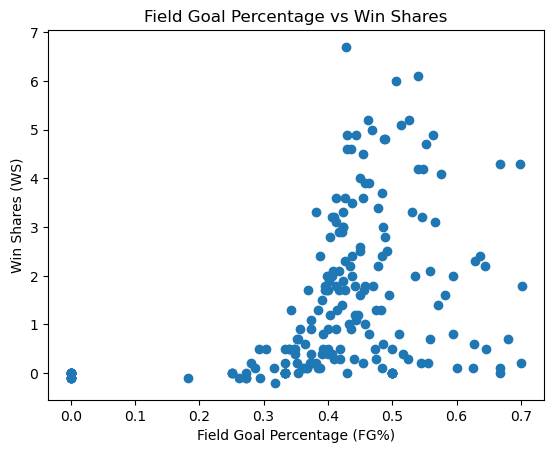

Correlation between FG% and WS: 0.4210663894199782


In [21]:
#5. extra credit

#bar chart showing top 5 players by total points scored (PTS)
top_5_scorers = df[['Player', 'PTS']].sort_values(by='PTS', ascending=False).head(5)
plt.bar(top_5_scorers['Player'], top_5_scorers['PTS'], color='blue')
plt.title('Top 5 Players by Total Points')
plt.xlabel('Player')
plt.ylabel('Total Points')
plt.xticks(rotation=45)
plt.show()

#correlation between field goal percentage (FG%) and win shares (WS)
df_corr = df[['FG%', 'WS']].dropna() #drop rows with NaN values in FG% or WS to perform correlation analysis

#scatter plot
plt.scatter(df_corr['FG%'], df_corr['WS'])
plt.title('Field Goal Percentage vs Win Shares')
plt.xlabel('Field Goal Percentage (FG%)')
plt.ylabel('Win Shares (WS)')
plt.show()

#calculate and display correlation coefficient
correlation = df_corr.corr().loc['FG%', 'WS']
print(f"Correlation between FG% and WS: {correlation}")